In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
vol_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/volume_aftercooling_2.dat'
pressure_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/pressure_aftercooling_2.dat'
temperature_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/temperature_aftercooling_2.dat'

In [22]:
vol_data = pd.read_csv(vol_path, sep='\s+', skiprows=1)
pressure_data = pd.read_csv(pressure_path, sep='\s+', skiprows=1)
temperature_data = pd.read_csv(temperature_path, sep='\s+', skiprows=1)

In [23]:
vol_labels=vol_data.columns[1:]
vol_values=vol_data.values[:, :-1]
pressure_labels=pressure_data.columns[1:]
pressure_values=pressure_data.values[:, :-1]
temperature_labels=temperature_data.columns[1:]
temperature_values=temperature_data.values[:, :-1]

In [24]:
timeStep = 0.5e-6 # ns
volumeScale = 1e-3
densityScale = 10**24 # A^3 -> cm^3
targetPressure = 1
molarMass = 197.97 # g/mol 
particleCount = 500 
# Total ion-pairs = 500 
totalMass = molarMass*particleCount/(6.022*10**23) # g 


# Literature denisty 
# 1.3-dimethylimidazolium tetrafluoroborate
refDensity = 1.294 # g/cm^3

In [25]:
den_vals = totalMass/vol_values[:, 1]

In [26]:
# Get cumulative average of volume and pressure
vol_cumulative = np.cumsum(vol_values[:, 1], axis=0)
vol_cumulative /= np.arange(1, vol_cumulative.shape[0]+1)
den_cumulative = totalMass/vol_cumulative # g/nm^3
pressure_cumulative = np.cumsum(pressure_values[:, 1], axis=0)
pressure_cumulative /= np.arange(1, pressure_cumulative.shape[0]+1)
temp_cumulative = np.cumsum(temperature_values[:, 1], axis=0)
temp_cumulative /= np.arange(1, temp_cumulative.shape[0]+1)

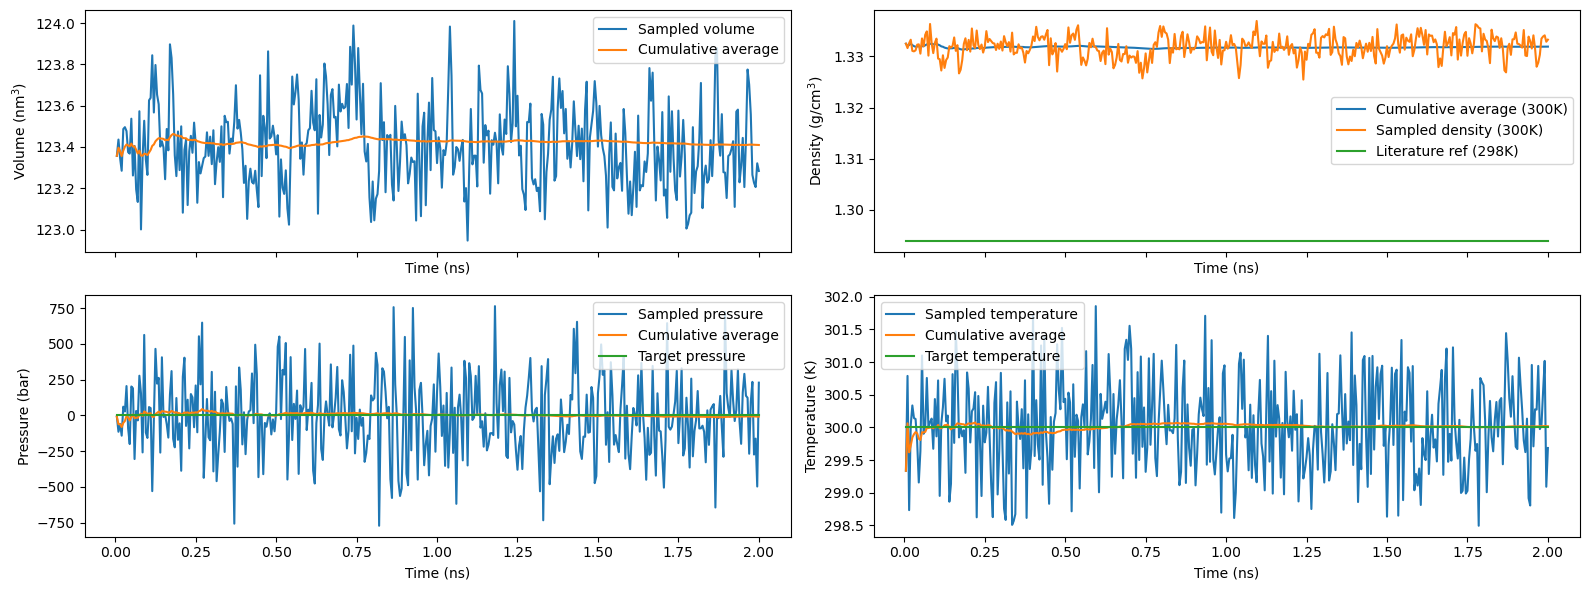

In [30]:
# Make a 2 x 1 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(16, 6)

# Plot the volume
axes[0, 0].plot(timeStep*vol_values[:, 0], vol_values[:, 1]*volumeScale, label='Sampled volume')
axes[0, 0].plot(timeStep*vol_values[:, 0], vol_cumulative*volumeScale, label='Cumulative average')

# Label the axes
axes[0, 0].set_xlabel('Time (ns)')
axes[0, 0].set_ylabel(r'Volume (nm$^3$)')
axes[0, 0].legend()

axes[0, 1].plot(timeStep*vol_values[:, 0], den_cumulative*densityScale, label='Cumulative average (300K)')
axes[0, 1].plot(timeStep*vol_values[:, 0], den_vals*densityScale, label='Sampled density (300K)')
axes[0, 1].plot(timeStep*vol_values[:, 0], refDensity*np.ones(vol_values.shape[0]), label='Literature ref (298K)')
axes[0, 1].set_xlabel('Time (ns)')
axes[0, 1].set_ylabel(r'Density (g/cm$^3$)')
axes[0, 1].legend()

# Plot the pressure
axes[1, 0].plot(timeStep*pressure_values[:, 0], pressure_values[:, 1], label='Sampled pressure')
axes[1, 0].plot(timeStep*pressure_values[:, 0], pressure_cumulative, label='Cumulative average')
axes[1, 0].plot(timeStep*pressure_values[:, 0], targetPressure*np.ones(pressure_values.shape[0]), label='Target pressure')
axes[1, 0].set_xlabel('Time (ns)')
axes[1, 0].set_ylabel(r'Pressure (bar)')
#axes[2].set_ylim(0, 25)
axes[1, 0].legend()

# Plot the temperature
axes[1, 1].plot(timeStep*temperature_values[:, 0], temperature_values[:, 1], label='Sampled temperature')
axes[1, 1].plot(timeStep*temperature_values[:, 0], temp_cumulative, label='Cumulative average')
axes[1,1].plot(timeStep*temperature_values[:, 0], 300*np.ones(temperature_values.shape[0]), label='Target temperature')
axes[1, 1].set_xlabel('Time (ns)')
axes[1, 1].set_ylabel(r'Temperature (K)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


